In [22]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [23]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)

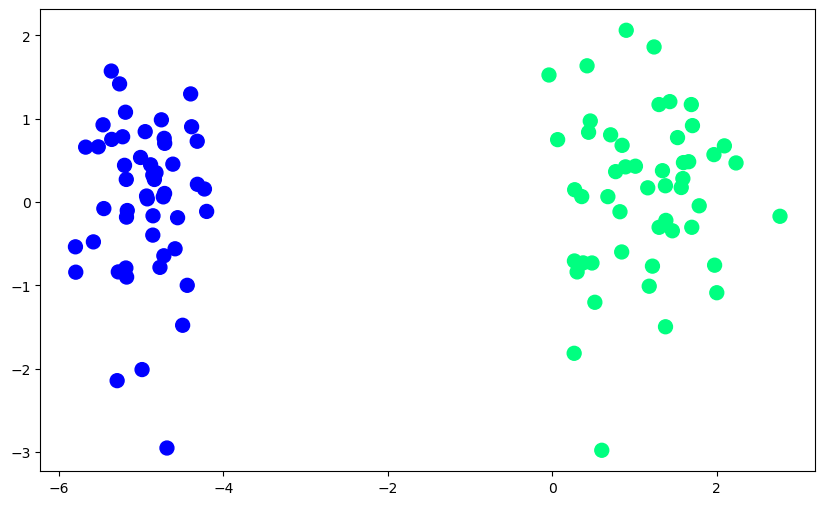

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [25]:
def step(z):
    return 1 if z>0 else 0

In [26]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

In [27]:
intercept_, coef_ = perceptron(X, y)
print(coef_)
print(intercept_)

[1.1204053  0.40381514]
1.2000000000000002


In [28]:
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

In [29]:
x_input = np.linspace(-3, 3, 100)
y_input_step = m * x_input + b

(-3.0, 2.0)

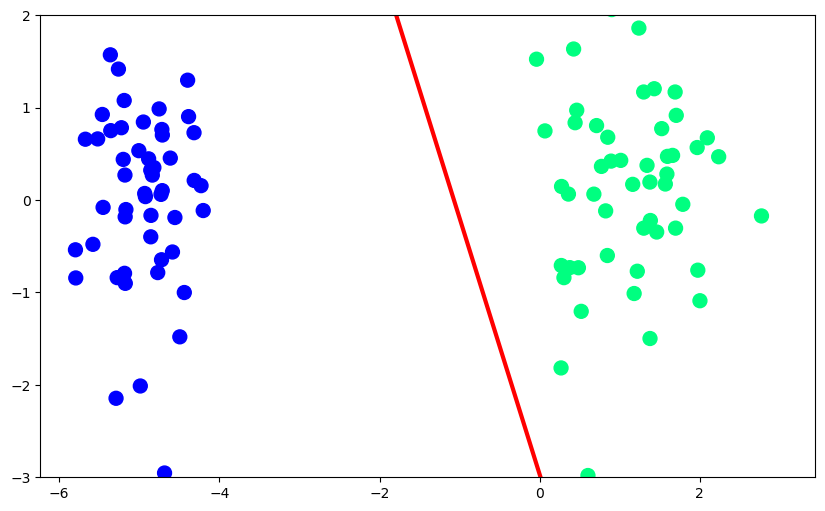

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input_step, color='red', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression()
lor.fit(X, y)

LogisticRegression()

In [32]:
m = -(lor.coef_[0][0] / lor.coef_[0][1])
b = -(lor.intercept_ / lor.coef_[0][1])

In [33]:
y_input_lr = m * x_input + b

(-3.0, 2.0)

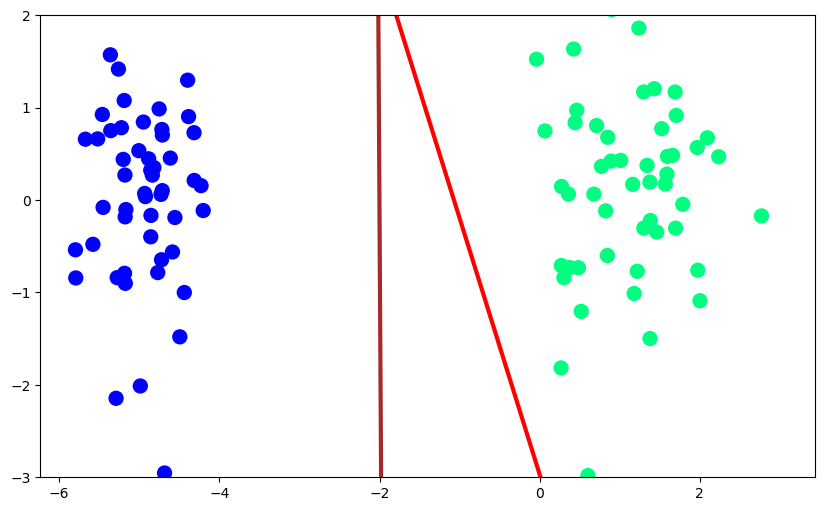

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input_step, color='red', linewidth=3)
plt.plot(x_input, y_input_lr, color='brown', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)

# Using Sigmoid function
![A descriptive alt text](sigmoid.png)

In [35]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

![A descriptive alt text](weight_loss.png)

In [36]:
def perceptronSigmoid(X,y): 
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    epochs = 1000
    for i in range(epochs):
        idx = np.random.randint(0,100)
        
        y_hat = sigmoid(np.dot(X[idx],weights))
        weights = weights + lr * (y[idx] - y_hat) * X[idx]
        
    return weights[0], weights[1:]

In [37]:
intercept_, coef_ = perceptronSigmoid(X,y)

In [38]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [39]:
y_input_sigmoid = m * x_input + b

(-3.0, 2.0)

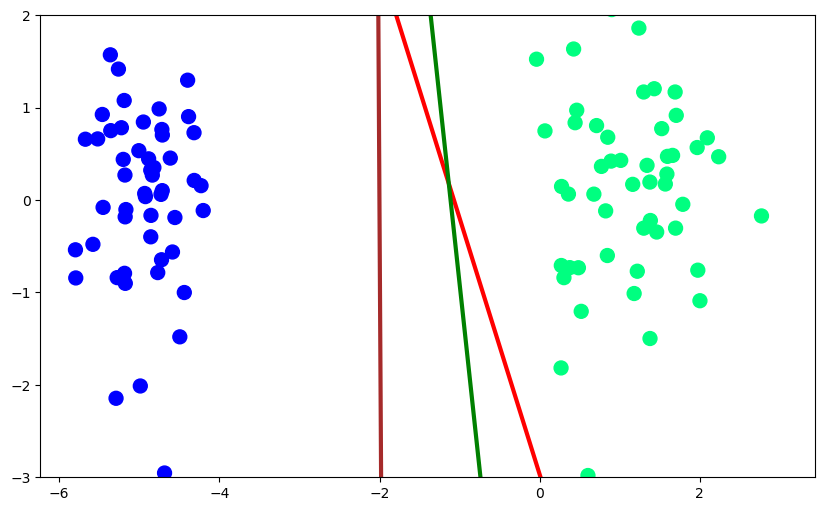

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input_step, color='red', linewidth=3)
plt.plot(x_input, y_input_lr, color='brown', linewidth=3)
plt.plot(x_input, y_input_sigmoid, color='green', linewidth=3)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)
